# NYC Taxi project

This is an attmept at the Kaggle competition to predict the total ride duration in taxi trips in the New York City. Kaggle has provided with training and test data set.

## 1. Answering the data analytics question

What type of data analytics queston is this? Ans. This is a regression problem to predict the ride duration
What is the measurement of success for the project Ans. If the accuracy of prediction is above 90% the model is considered to be a success.
Can the question be answered from the given data? Ans. Yes, a quick run through the data gives enough evidence to suggest that the question can be solved fro m the given data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import re #for processing regular expression
import datetime #for datetime operations
import time # to get system time
import matplotlib.pyplot as plt # for plotting
import  math
import folium

In [3]:
start = time.time()
train_df = pd.read_csv('/Users/shawnchacko/Desktop/Jupyter/NYC-Taxi-Project/train.csv')
end = time.time()
print ("Time taken by this script is {} sec.".format(end-start))
train_df.head(10)

Time taken by this script is 6.66426992416 sec.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


## 2. Tyding up the data

Checking if all columns have the same number of entries. ie if any NaN columns exists

In [4]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Looks like all the columns have the same number of entries. But as the number of entries are so huge lets dive deap and see if we can get a clearer picture.

In [5]:
train_df.isnull().sum() #Checking if there is any non zero values in each column

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
print ("Number of columns in the data set is {}.".format(train_df.shape[0])) #counting the number of columns
print ("Number of non null values in the data set are {}.".format(train_df.id.nunique())) #counting the number of non null values

Number of columns in the data set is 1458644.
Number of non null values in the data set are 1458644.


Below plot shows a density plot with x axis having the trip duration and y axis the density curve with area under the curve is 1.

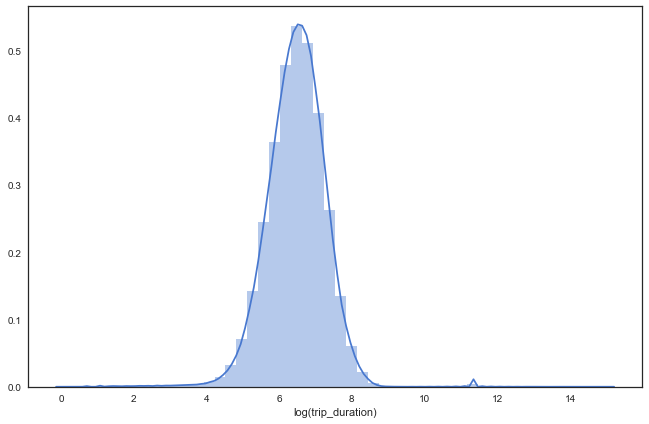

In [7]:
%matplotlib inline
sb.set(style = 'white', palette = 'muted', color_codes = True)
f, axes = plt.subplots(1,1, figsize = (11,7), sharex=True)
sb.distplot(np.log(train_df['trip_duration'].values), bins = 50, axlabel = 'log(trip_duration)')
#plt.setp(axes, yticks=[])
#plt.tight_layout()

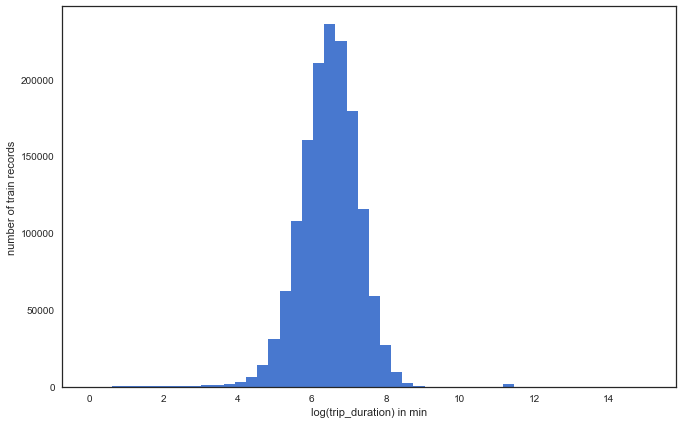

In [8]:
%matplotlib inline
f, axes = plt.subplots(1,1, figsize = (11,7), sharex=True)
plt.hist(np.log(train_df['trip_duration'].values), bins = 50)
plt.xlabel('log(trip_duration) in min')
plt.ylabel('number of train records')

In [9]:
print ("Most travel durations are between {} and {} minutes".format(math.exp(4)/60, math.exp(8)/60))

Most travel durations are between 0.909969167219 and 49.6826331174 minutes


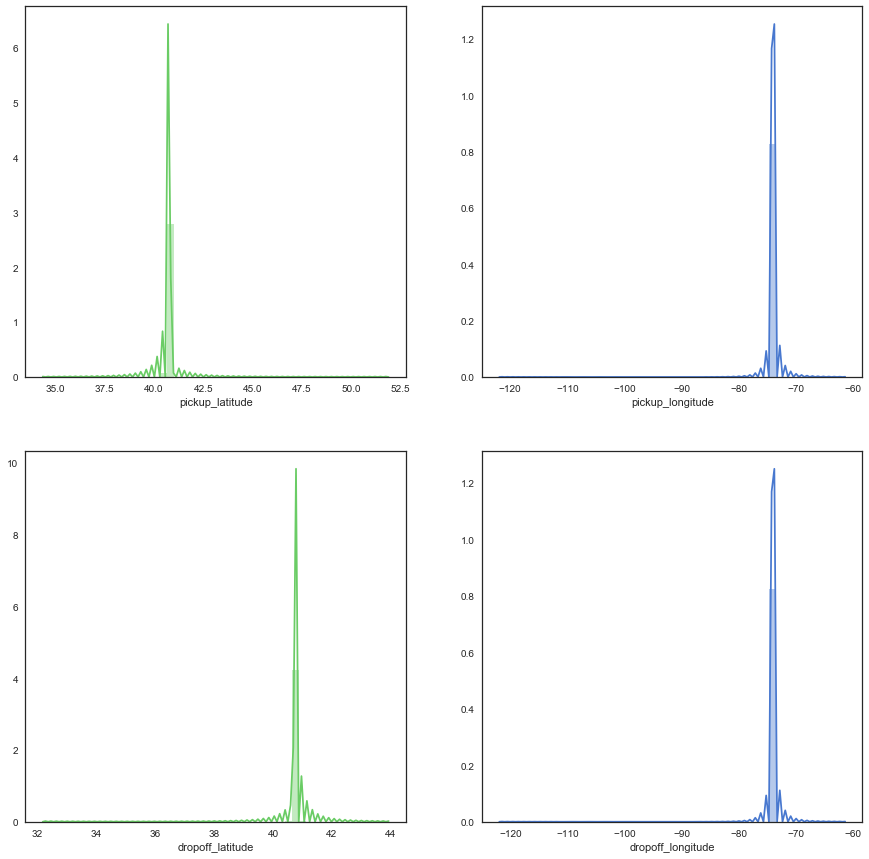

In [10]:
f, axes = plt.subplots(2,2, figsize = (15,15))
sb.set(style="white", palette="muted", color_codes=True)
sb.distplot(train_df['pickup_latitude'].values, axlabel = 'pickup_latitude', color = 'g', bins = 50, ax = axes[0,0])
sb.distplot(train_df['pickup_longitude'].values, axlabel = 'pickup_longitude', color = 'b', bins = 50, ax = axes[0,1])
sb.distplot(train_df['dropoff_latitude'].values, axlabel = 'dropoff_latitude', color = 'g', bins = 50, ax = axes[1,0])
sb.distplot(train_df['dropoff_longitude'].values, axlabel = 'dropoff_longitude', color = 'b', bins = 50, ax = axes[1,1])

Dropping the outlier latitudes and longtudes for better visualisation

In [11]:
df = train_df.loc[(train_df.pickup_latitude > 40.6) & (train_df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
train_data = df
df.head()
print df.count()

id                    1452385
vendor_id             1452385
pickup_datetime       1452385
dropoff_datetime      1452385
passenger_count       1452385
pickup_longitude      1452385
pickup_latitude       1452385
dropoff_longitude     1452385
dropoff_latitude      1452385
store_and_fwd_flag    1452385
trip_duration         1452385
dtype: int64


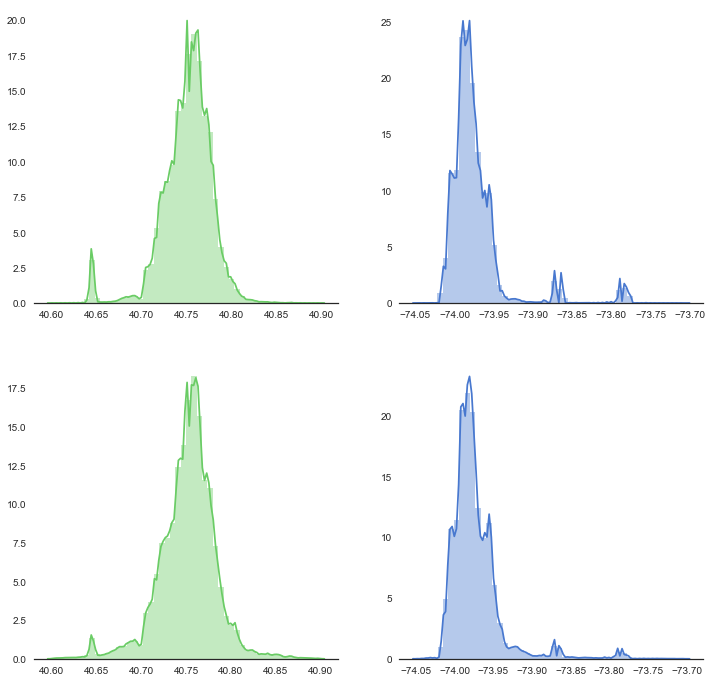

In [12]:
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sb.despine(left=True)
sb.distplot(train_data['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 50, ax=axes[0,0])
sb.distplot(train_data['pickup_longitude'].values, label = 'pickup_longitude',color="b",bins =50, ax=axes[0,1])
sb.distplot(train_data['dropoff_latitude'].values, label = 'dropoff_latitude',color="g",bins =50, ax=axes[1, 0])
sb.distplot(train_data['dropoff_longitude'].values, label = 'dropoff_longitude',color="b",bins =50, ax=axes[1, 1])

The above graph shows the distribution without the outlier trips.

In [13]:
#creating a map using folium. But its taking too much time.
#temp_location = train_data.copy()
#data_map = folium.Map(prefer_canvas=True)

#def plotDot(point):
#    folium.CircleMarker(location=[point.pickup_latitude, point.pickup_longitude],
#                        radius=2, fill_color='green',
#                        weight=0).add_to(this_map)
    
#def plotDot1(point):
#     folium.CircleMarker(location=[point.dropoff_latitude, point.dropoff_longitude],
#                         radius=2, fill_color='magenta',
#                         weight=0).add_to(this_map)


# temp_location.apply(plotDot, axis = 1)
# temp_location.apply(plotDot1, axis = 1)


# #Set the zoom to the maximum possible
# data_map.fit_bounds(this_map.get_bounds())

# #Save the map to an HTML file
# #data_map.save('html_map_output/simple_dot_plot.html')

# data_map

### Grouping trips for each date
Let us group the trips according to the vendor and the date. There are two vendors; vendor1 and vendor2. Lets visualise on each date what is the average trip duration for each vendor.

In [14]:
temp = train_data.copy()
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pick_date'] = train_data['pickup_datetime'].dt.date
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26


In [15]:
ts_v1 = pd.DataFrame(train_data.loc[train_data['vendor_id']==1].groupby('pick_date')['trip_duration'].mean())
ts_v1.reset_index(inplace = True)

ts_v2 = pd.DataFrame(train_data.loc[train_data.vendor_id==2].groupby('pick_date')['trip_duration'].mean())
ts_v2.reset_index(inplace = True)

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding graph'

for data, name, color in zip([ts_v1, ts_v2], ["vendor 1", "vendor 2"], Spectral4):
    df = data
    p.line(df['pick_date'], df['trip_duration'], line_width=2, color=color, alpha=0.8, legend=name)

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

Loading BokehJS ...

/Users/shawnchacko/anaconda/lib/python2.7/site-packages/bokeh/core/json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


### Seasonal affects on the data:

Now lets see if there is any seasonal affects. Lets plot the number of trips by each vendor on a particular date.

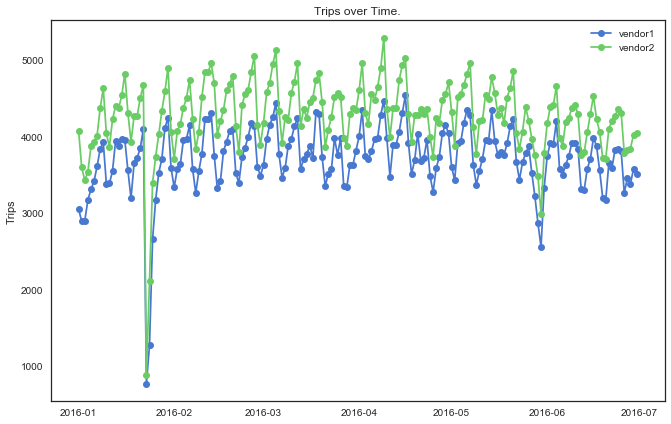

In [16]:
f, axes = plt.subplots(1,1, figsize = (11,7), sharex=True)
plt.plot(train_data.loc[train_data['vendor_id']==1].groupby('pick_date').count()[['vendor_id']], 'o-', label='vendor1')
plt.plot(train_data.loc[train_data['vendor_id']==2].groupby('pick_date').count()[['vendor_id']], 'o-', label='vendor2')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

From the above plot its quite clear that the number of trips done by vendor 2 is greater than vendor 1 on all days in the six months data avaialable.

#### Why do we have a drastic drop in the number of calls on a particular date?

From the above plot its also clear that there is a big drop in the number of trips on days in January. Lets investigate on what date those drops where and if there is any significance in the US calender.

In [85]:
from datetime import date
from datetime import datetime
import holidays

abnormal_date = train_data.loc[train_data['vendor_id']==1].groupby('pick_date').count()[['pickup_datetime']].idxmin()
date = abnormal_date['pickup_datetime'].strftime('%m/%d/%Y')
date in holidays.UnitedStates()
if date in holidays.UnitedStates() == True:
    print ("{} is  a public holiday").format(date)
else:
    print ("{} is not a public holiday").format(date)

01/23/2016 is not a public holiday


The above analysis confirms that 23rd of January is not a public holiday. From intuition and a quick internet search I found that there was heavy snow fall on 23rd January 2016 in NYC. So, we have a reason for the drop in the number of calls. I cant find any reason to do further analysis for that date.

#### Visualise data for each day of the week

In [101]:
train_data = train_df
#train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime()
train_data.loc[:, 'pickup_month'] = train_data['pickup_datetime'].dt.month
train_data.loc[:, 'day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
train_data.loc[:, 'day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data.loc[:, 'hour'] = train_data['pickup_datetime'].dt.hour
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,hour,day_of_year,day_of_week,pickup_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,17,74,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,164,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,19,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,19,97,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,13,86,5,3


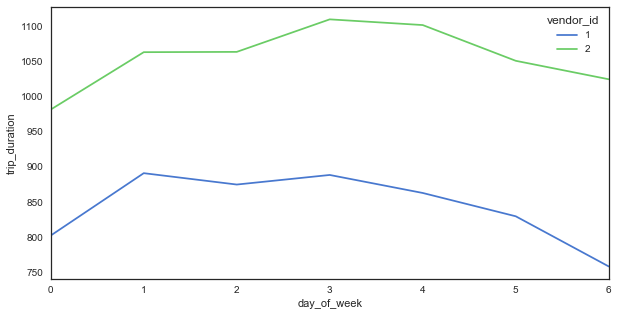

In [140]:
weekdays_avg_duration = pd.DataFrame(train_data.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
weekdays_avg_duration.reset_index(inplace = True)
weekdays_avg_duration['unit']=1

f, axes = plt.subplots(figsize=(10, 5), sharex=False, sharey = False)
sb.set(style="white", palette="muted", color_codes=True)
sb.tsplot(data=weekdays_avg_duration, time="day_of_week", unit = "unit", condition="vendor_id", value="trip_duration")

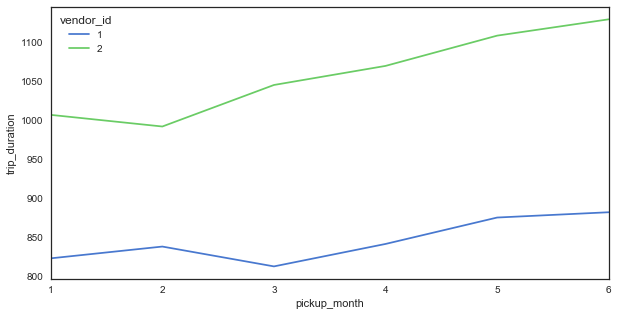

In [142]:
weekdays_avg_duration = pd.DataFrame(train_data.groupby(['vendor_id','pickup_month'])['trip_duration'].mean())
weekdays_avg_duration.reset_index(inplace = True)
weekdays_avg_duration['unit']=1

f, axes = plt.subplots(figsize=(10, 5), sharex=False, sharey = False)
sb.set(style="white", palette="muted", color_codes=True)
sb.tsplot(data=weekdays_avg_duration, time="pickup_month", unit = "unit", condition="vendor_id", value="trip_duration")